# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [78]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [79]:
# Haga el cálculo aquí
grado = 3.6 * 10**6 # 1 grado = 3.6 * 10**6 mas
D = 0.5*grado # Distancia recorrida, 0.5 grados en mas
tiempo = D/1 # Distancia / velocidad (posición en [mas]) = tiempo [años]
tiempo # [en años] Casi dos millones de años

1800000.0

### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [80]:
path_archivo = '/content/drive/MyDrive/Docs/ngc5694_pm.csv'
data = pd.read_csv(path_archivo)
data

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [81]:
# Muestra las columnas aquí
data.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [82]:
# Muestra el DataFrame aquí
data.head(10)

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
5,5,219.359785,-27.111371,-0.857753,-1.178311
6,6,219.370317,-26.963460,-0.530987,-0.564592
7,7,219.365531,-26.966464,-0.866077,-0.659245
8,8,219.516236,-27.078855,-0.414927,-0.439393
9,9,219.628222,-27.030709,0.260185,-1.312268


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [84]:
pmra = data["pmra"] # Acceder a columna específica
pmdec = data["pmdec"]

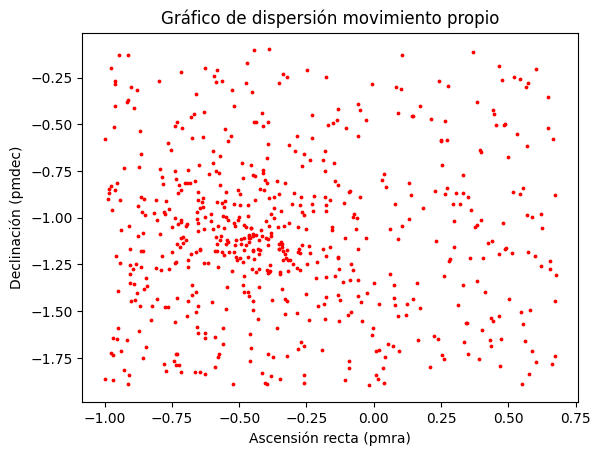

In [85]:
# Haga el gráfico en esta celda
plt.scatter(pmra, pmdec, s=3, c="red")
plt.xlabel("Ascensión recta (pmra)") # pmra
plt.ylabel("Declinación (pmdec)") # pmdec
plt.title("Gráfico de dispersión movimiento propio")
plt.show()

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [86]:
mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

In [87]:
from scipy.stats import norm

x_pmra = np.linspace(-1.5, 1, 300) # Array de números del -1.5 al 1, 300 números en total.
fx_pmra = (1/(np.sqrt(2*np.pi*(std_pmra**2))))*np.exp(-((x_pmra - mu_pmra)**2)/(2*std_pmra**2)) # separé la función en el inverso de la raiz, y la exponencial, para hacer más fácil el código, luego multipliqué ambos

x_pmdec = np.linspace(-2.5, 0.5, 300) # Array de números del -2.5 al 0.5, 300 números en total.
fx_pmdec = (1/(np.sqrt(2*np.pi*(std_pmdec**2))))*np.exp(-((x_pmdec - mu_pmdec)**2)/(2*std_pmdec**2))

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

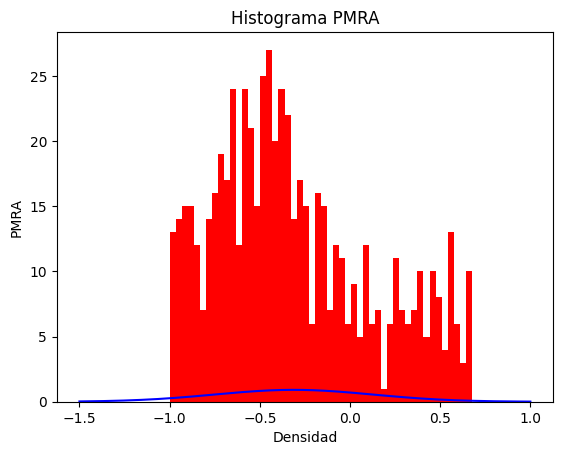

In [88]:
plt.hist(pmra, bins=50, color="red")
plt.plot(x_pmra, fx_pmra, color="blue") # Gaussiana
plt.title("Histograma PMRA")
plt.ylabel("PMRA")
plt.xlabel("Densidad")
plt.show()

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

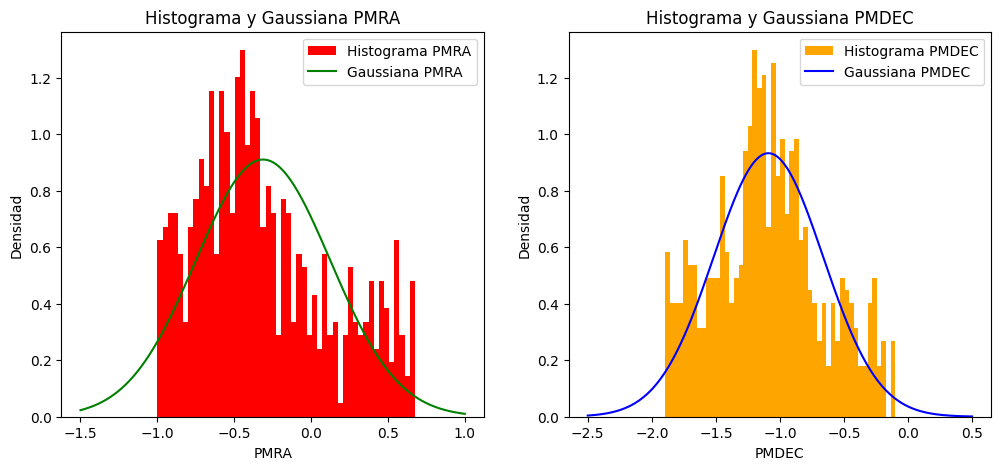

In [89]:
fig, pm = plt.subplots(1, 2, figsize=(12, 5))
# PMRA
pm[0].hist(pmra, bins=50, density=True, color="red", label="Histograma PMRA")
pm[0].plot(x_pmra, fx_pmra, color="green", label="Gaussiana PMRA")
pm[0].set_xlabel("PMRA")
pm[0].set_ylabel("Densidad")
pm[0].set_title("Histograma y Gaussiana PMRA")
pm[0].legend()

# PMDEC
pm[1].hist(pmdec, bins=50, density=True, color="orange", label="Histograma PMDEC")
pm[1].plot(x_pmdec, fx_pmdec, color="blue", label="Gaussiana PMDEC")
pm[1].set_xlabel("PMDEC")
pm[1].set_ylabel("Densidad")
pm[1].set_title("Histograma y Gaussiana PMDEC")
pm[1].legend()

plt.show()

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

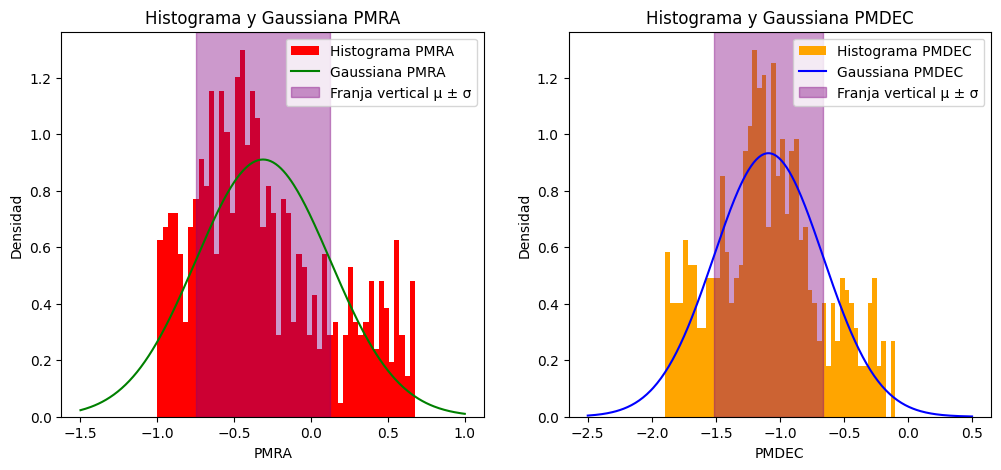

In [90]:
fig, pm = plt.subplots(1, 2, figsize=(12, 5))
# PMRA
pm[0].hist(pmra, bins=50, density=True, color="red", label="Histograma PMRA")
pm[0].plot(x_pmra, fx_pmra, color="green", label="Gaussiana PMRA")
pm[0].set_xlabel("PMRA")
pm[0].set_ylabel("Densidad")
pm[0].set_title("Histograma y Gaussiana PMRA")
pm[0].axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color="purple", alpha=0.4, label="Franja vertical μ ± σ")
pm[0].legend()

# PMDEC
pm[1].hist(pmdec, bins=50, density=True, color="orange", label="Histograma PMDEC")
pm[1].plot(x_pmdec, fx_pmdec, color="blue", label="Gaussiana PMDEC")
pm[1].set_xlabel("PMDEC")
pm[1].set_ylabel("Densidad")
pm[1].set_title("Histograma y Gaussiana PMDEC")
pm[1].axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color="purple", alpha=0.4, label="Franja vertical μ ± σ")
pm[1].legend()

plt.show()
# Perdón por la horrenda selección de colores, pero creo que así contrastan más y se ven bien los datos, igual se pudo haber hecho más bonito D:

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** Aproximadamente -0.3 para pmra, y 0.9 para pmdec

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [91]:
# Lea y muestre el DataFrame aquí
data = pd.read_csv("/content/drive/MyDrive/Docs/data_spectra.csv")
data.head(10)

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
5,5,13899.273748,0.919151,1.358400,1.347122,1.296573,1.289028,0.610227,0.678171,1.025992,...,0.638233,0.889149,0.688446,1.159876,1.324555,1.394010,0.976434,0.996779,0.902522,0.812551
6,6,13900.496737,1.146592,0.649125,0.606552,0.764381,0.986042,1.169505,1.347068,1.327184,...,1.002957,0.926086,1.351365,1.152762,1.021284,1.187816,0.659958,1.261469,1.053260,1.388193
7,7,13901.719727,1.129581,0.971864,1.031087,0.836858,0.783988,0.657929,1.257945,1.240843,...,0.730249,0.623041,1.172950,0.804725,1.309663,0.646853,1.254253,0.970611,0.664310,1.396251
8,8,13902.942716,1.061680,0.737761,0.868106,1.298075,0.988404,1.343663,0.614023,0.849140,...,0.622240,1.207229,1.061244,0.689349,1.014547,1.079259,1.351131,0.605414,1.215670,1.035637
9,9,13904.165705,1.023624,1.225367,1.336704,1.088226,0.918456,1.058943,1.108686,1.230231,...,0.768321,0.718509,1.306463,0.665183,1.000925,1.189598,1.030669,0.928813,1.351778,0.783566


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** Se ven 3 alrededor de longitud de onda = 15250

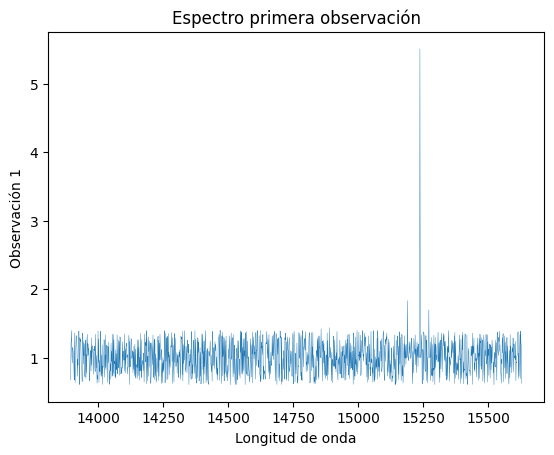

In [92]:
# Grafique aquí
obs_1 = data["obs_1"]
wLth = data["Wlth"]
plt.plot(wLth, obs_1, linewidth=0.3) #linewidth para graficar líneas más delgadas y así poder apreciar mejor los datos
plt.title("Espectro primera observación")
plt.xlabel("Longitud de onda")
plt.ylabel("Observación 1")
plt.show()

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Intentaré calcular la diferencia entre la columna y su promedio

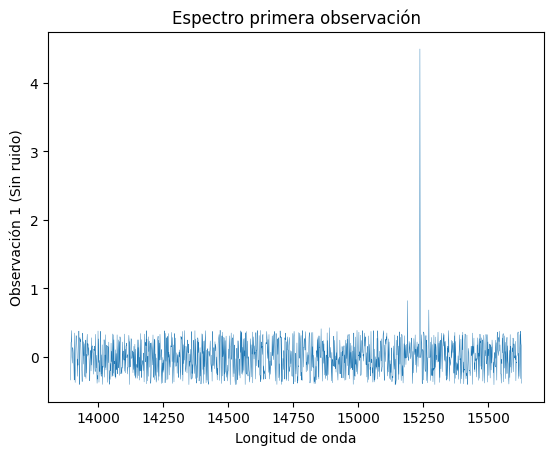

In [93]:
# Grafique el espectro centrado en 0 aquí
obs_1Mean = obs_1.mean()
obs_1NoRuido = obs_1 - obs_1Mean # Todos los datos restando el promedio
plt.plot(wLth, obs_1NoRuido, linewidth=0.3)
plt.title("Espectro primera observación")
plt.ylabel("Observación 1 (Sin ruido)")
plt.xlabel("Longitud de onda")
plt.show()

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [94]:
obs_1Std = obs_1.std() # Desviación estándar de obs_1
ruido = (obs_1 >= (obs_1Mean - 3 *obs_1Std)) & (obs_1 <= (obs_1Mean + 3 *obs_1Std))
# En ruido estoy incluyendo todos los valores de obs_1 mayores e iguales al promedio - 3*σ,
# y todos los menores e iguales al promedio + 3*σ

2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

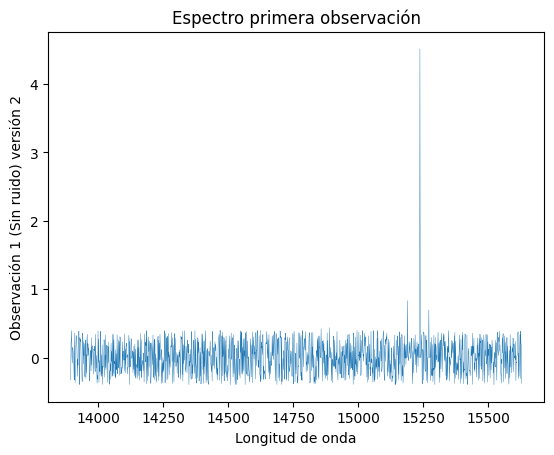

In [95]:
# Grafique el espectro centrado en 0 aquí
obs_1Limpio = obs_1 - ruido.mean() # Espectro centrado sin ruido
plt.plot(wLth, obs_1Limpio, linewidth=0.3)
plt.title("Espectro primera observación")
plt.ylabel("Observación 1 (Sin ruido) versión 2")
plt.xlabel("Longitud de onda")
plt.show()

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** con n = 11 me parece adecuado pues pareciera encerrar lo más preciso posible a los datos del gráfico

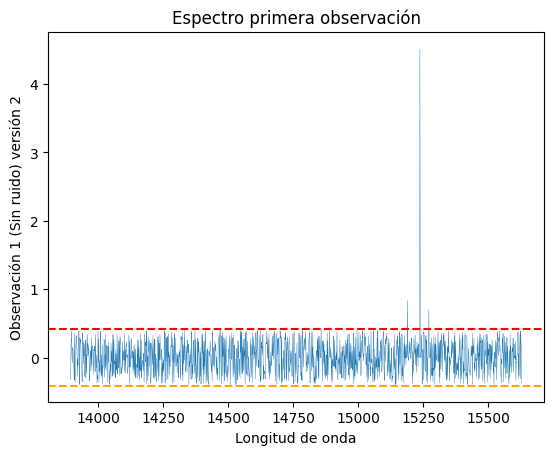

In [96]:
ruido.std() # Desviación estandar del ruido
n = 11
# Gráfico del espectro sin ruido
obs_1Limpio = obs_1 - ruido.mean()
plt.plot(wLth, obs_1Limpio, linewidth=0.3)
plt.title("Espectro primera observación")
plt.ylabel("Observación 1 (Sin ruido) versión 2")
plt.xlabel("Longitud de onda")
plt.axhline(y=n*ruido.std(), color="red", linestyle="--", label=f"+{n}σ") # Margen +n*σ, linestyle en -- para ver mejor como va "encerrando" los datos
plt.axhline(y=-n*ruido.std(), color="orange", linestyle="--", label=f"-{n}σ") # Margen -n*σ
plt.show()

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [97]:
dataLimpio = data.copy() # Una copia del dataframe por si se rompe todo

for i in data.columns[2:22]: # Ciclo donde se generaliza el proceso desde las columnas 2 hasta la 21. (Índice 0 es "Unnamed: 0", índice 1 es wLth)
  obs = data[i]
  obs_mean = obs.mean()
  obs_std = obs.std()
  obs_ruido = (obs >= (obs_mean - 3 *obs_std)) & (obs <= (obs_mean + 3 *obs_std))
  obs_limpio = obs - obs_ruido.mean() # Es exactamente el mismo proceso anterior pero para cada columna en el ciclo.
  dataLimpio[i] = obs_limpio # Se sobreescriben las columnas de la copia del dataframe, con las columnas limpias calculadas del dataframe original
  # Asi se mantiene el dataframe original "data" intacto por si acaso, y el "dataLimpio" posee las columnas editadas de forma que estén limpias de ruido.

2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [98]:
std_valores = [] # Lista para guardar valores
std_valores.append(dataLimpio["obs_1"].std())
promedio_acumulado = dataLimpio["obs_1"].copy() # Valor inicial del promedio acumulado

for i in range(3, 22): # Índices de columnas obs 2 hasta obs 20. obs 1 se excluyó pues al ser el valor inicial del algoritmo se usó antes, fuera del ciclo.
  obs = dataLimpio.iloc[:, i] # Rango de columnas desde obs_2 hasta obs_(i-1)
  promedio_acumulado = (promedio_acumulado*(i-2) + obs)/(i-1) #Al multiplicar por (i-2), estoy cancelando la división por (i-1) de la iteración anterior del ciclo.
  # De esta forma tengo la suma intacta de las columnas hasta esa iteración, y luego le sumo la nueva obs y divido todo por (i-1) que es la cantidad de columnas sumadas hasta el momento
  std_valores.append(promedio_acumulado.std())
dataLimpio["obs_all"] = promedio_acumulado


 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:** La desviación estándar va disminuyendo mucho a medida que aumenta el número de observaciones y así el número de promedios acumulados, esto se debe a que cada vez se va eliminando más ruido con cada promedio, reduciendo así la desviación de los datos

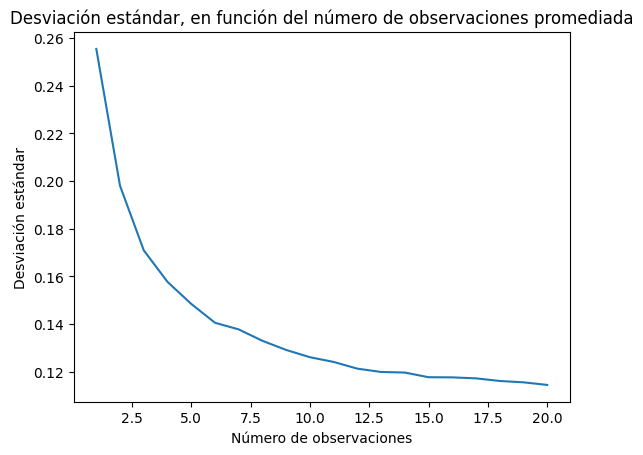

In [101]:
N = list(range(1, len(std_valores) + 1)) # Número de observaciones promediada, de forma creciente en una lista para poder graficar.
plt.plot(N, std_valores)
plt.xlabel("Número de observaciones")
plt.ylabel("Desviación estándar")
plt.title("Desviación estándar, en función del número de observaciones promediada")
plt.show()

### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** Ahora en total se aprecian 5 líneas de emisión, se ven más que antes debido a que se limpió el ruido que tenían los datos, por lo que las líneas de emisión destacan con más facilidad.

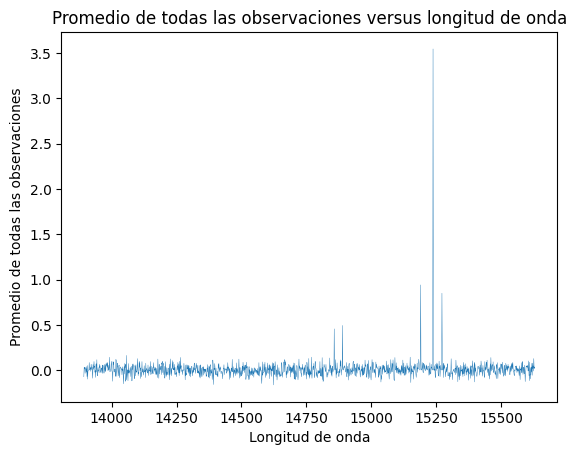

In [105]:
obs_all = dataLimpio["obs_all"]
plt.plot(wLth, obs_all, linewidth=0.3)
plt.xlabel("Longitud de onda")
plt.ylabel("Promedio de todas las observaciones")
plt.title("Promedio de todas las observaciones versus longitud de onda")
plt.show()